In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 1 19:11:56 2021

@author: preshitadave
"""

#Importing all the required libraries 
import random
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as sps
import pandas as pd


class PCR_cycle:
    '''
    This class describes the methods to:
    A) Construct sequences during 'n' number of PCR cycles through different mutation rates of mu. 
    B) Calculates the number of distinct sequences.
    C) Plots the distribution of relative abundances.
    D) Calculates the entropy of the distinct sequences
    '''
    def __init__(self, mu, seq):
        '''
        Initialization constructor
        
        Parameters
        ----------
    
        mu : float, it is the mutation rate for replication in PCR cycles
        seq : list, it acts as the parent sequence
    
        Returns
        -------
        None
    
        '''          
        self.NumCycles = 13 # Number of cycles run in a PCR cycle 
        self.nucleotides = ['A','T','G','C'] # represents nucleotides A, T, G and C respectively
        self.seq = seq
        self.mu = mu 
    def pcr(self): 
        '''
        Creates and stores the sequences generated after PCR amplification at a mutation rate of mu.

    
        Returns
        -------
        total_seq: list, stores all the sequences after PCR amplification
    
        '''  
        # create a list that contains all the sequences 
        self.total_seq = [self.seq]
        # create a list that contains the parent_sequences
        parent_seq = [self.seq]
        for i in range(self.NumCycles): # for iterating through the number of PCR cycles        
            for seq in parent_seq:#iterate through every parent strand
                mutated_seq = [] # holds the new mutated sequence that is produced at the end of conservative replication            
                mutation = random.choices([0,1], weights = [1-self.mu, self.mu], k=100) # tells us the site at which mutations happen
                for k in range(100): # iterating through a sequence in the parent strand
                    nt = seq[k]
                    mutated_nt = [x for x in self.nucleotides if x != nt]
                    if mutation[k]==0: # if no mutation were to occur
                        mutated_seq.append(nt)
                    else: # if no mutation were to occur i.e., mutation[k]==1
                        mutated_seq.append(random.choice(mutated_nt))
                
                self.total_seq.append(mutated_seq)
            parent_seq = self.total_seq.copy()        
        return self.total_seq
    
    def distinct_seq(self):
        '''
        Counts all the distinct sequences and stores the values in a dictionary and returns it.

        Returns
        -------
        total_count : dict, keys are the distinct sequences as a str 
    
        '''
        all_seq = self.pcr()
        
        # create an empty dictionary to store counts for all the distinct sequences
        self.total_count = {}
        
        for i in all_seq:
            seq=''.join(i) # convert list to a str 
            if seq not in self.total_count:
                self.total_count[seq] = 1

            else:
                self.total_count[seq] +=1    
                
        # quick method to get number of distinct sequences
        # self.num_distinct = len([list(y) for y in set([tuple(x) for x in all_seq])])
        self.num_distinct = len(self.total_count.keys())
        return self.num_distinct
        
    def abundance_plot(self):
        '''
        Creates a relative abundance distribution plot.
        
        Returns
        -------
        None.

        '''
        self.distinct_seq()
        #Plotting the relative abundance
        plt.rcParams['figure.figsize'] = [20, 10] # [x,y] 
        plt.figure(dpi=1200) #figure resolution
        
        plt.bar(np.arange(len(self.total_count.keys())), sorted(self.total_count.values(), reverse=True), width=0.8)
        plt.yscale('log')
        plt.title('Relative Abundance Plot for mu={val}'.format(val=self.mu), fontsize=15, fontweight='bold')
        plt.xlabel('Distinct Sequence ID', fontsize=13, fontweight='bold')
        plt.ylabel('Frequency', fontsize=13, fontweight='bold')

        xmin, xmax, ymin, ymax = plt.axis()
        plt.xticks(fontsize=13)
        plt.yticks(fontsize=13)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.show()
    
    def entropy(self):
        '''
        Calculates the entropy of the effective number of distinct sequences.
        
        Returns
        -------
        entropy: float, represents the entropy value calculated

        '''
        self.distinct_seq()
        entropy = 0
        all_val = sum(self.total_count.values())
        for k,v in self.total_count.items():
            p = v/all_val
            entropy += -p*np.log(p)
        return entropy
    


In [2]:
#setting a seed
random.seed(1)
#Creating the parent sequence
seq = [random.choice(['A','T','G','C']) for x in range(100)] # parent sequence  

In [3]:
test1 = PCR_cycle(0.01, seq)
print('The distinct number of sequences at the end of a PCR amplification found for mu=0.01 is: {num}'.format(num=test1.distinct_seq()))
test1.abundance_plot()
print('The entropy is found to be: '+str(f"{test1.entropy():.3}"))
print('The effective number of sequences based on entropy for mu=0.01 is:', round(np.exp(test1.entropy())))

The distinct number of sequences at the end of a PCR amplification found for mu=0.01 is: 5188


The entropy is found to be: 8.24
The effective number of sequences based on entropy for mu=0.01 is: 3821


In [4]:
test2 = PCR_cycle(0.001, seq)
print('The distinct number of sequences at the end of a PCR amplification found for mu=0.001 is: {num}'.format(num=test2.distinct_seq()))
test2.abundance_plot()
print('The entropy is found to be: '+str(f"{test2.entropy():.3}"))
print('The effective number of sequences based on entropy for mu=0.001 is:', round(np.exp(test2.entropy())))

The distinct number of sequences at the end of a PCR amplification found for mu=0.001 is: 545


The entropy is found to be: 3.23
The effective number of sequences based on entropy for mu=0.001 is: 15


In [5]:
test3 = PCR_cycle(0.0001, seq)
print('The distinct number of sequences at the end of a PCR amplification found for mu=0.0001 is: {num}'.format(num=test3.distinct_seq()))
test3.abundance_plot()
print('The entropy is found to be: '+str(f"{test3.entropy():.3}"))
print('The effective number of sequences based on entropy for mu=0.0001 is:', round(np.exp(test3.entropy())))

The distinct number of sequences at the end of a PCR amplification found for mu=0.0001 is: 62


The entropy is found to be: 0.354
The effective number of sequences based on entropy for mu=0.0001 is: 1


# EXTRA CREDIT 

A t-distribution is used when estimating the mean of a population in situations where the sample size is small and the population standard deviation is unknown. 
Hence, we use a t-distribution since we have a sample and not the entire population to model this distribution of data. We do not know the mean and the standard deviation of the population and use a T-distribution to estimate these parameters. 
As the sample size increases, the t-distribution curve starts resembling a normal distribution curve.



In [7]:
# Running the simulation for pcr to calculate distinct sequences 250 times 
test3 = PCR_cycle(0.0001, seq)
#create a list to store the number of distinct sequences for mu = 0.0001
distinct_250 = []
#iterating 250 times
for i in range(250):
    distinct_250.append(test3.distinct_seq())
print(distinct_250)

[80, 74, 66, 63, 63, 66, 65, 66, 83, 84, 87, 73, 67, 71, 78, 75, 84, 69, 73, 78, 73, 71, 78, 75, 71, 91, 91, 69, 77, 75, 70, 70, 78, 67, 75, 80, 80, 83, 78, 58, 63, 83, 78, 71, 73, 67, 79, 77, 69, 71, 60, 55, 72, 71, 76, 81, 63, 63, 72, 58, 79, 67, 76, 68, 78, 61, 73, 76, 91, 75, 72, 80, 75, 74, 87, 92, 72, 69, 85, 64, 67, 71, 82, 69, 73, 65, 67, 78, 66, 77, 77, 85, 82, 79, 72, 69, 70, 78, 64, 66, 67, 66, 77, 84, 74, 64, 89, 75, 71, 81, 65, 85, 69, 73, 74, 81, 82, 63, 72, 68, 78, 72, 73, 51, 62, 82, 66, 82, 79, 61, 69, 82, 75, 75, 70, 82, 73, 67, 76, 84, 75, 78, 94, 64, 73, 63, 84, 73, 79, 81, 84, 69, 75, 92, 70, 74, 71, 84, 74, 82, 78, 68, 67, 60, 84, 67, 83, 88, 66, 75, 64, 69, 74, 64, 54, 82, 70, 69, 81, 68, 78, 67, 78, 63, 84, 68, 68, 90, 71, 85, 68, 69, 67, 72, 69, 70, 72, 72, 83, 69, 70, 88, 72, 88, 82, 67, 71, 63, 88, 75, 82, 70, 83, 81, 73, 72, 71, 80, 71, 84, 80, 91, 68, 75, 84, 75, 79, 64, 72, 73, 77, 68, 85, 73, 63, 63, 75, 80, 72, 92, 66, 77, 68, 81, 78, 70, 73, 64, 74, 69]

In [79]:
### T DISTRIBUTION 
mean=np.mean(distinct_250) #calculating the mean of the sample 
s1=np.std(distinct_250,ddof=1) # calculating the standard deviation of the sample
n1=len(distinct_250) # number of elements in sample size
c1=0.95 #confidence level, estimating an interval 
dof1=n1-1 #degrees of freedom 
t1=sps.t.interval(c1, dof1, mean, sps.sem(distinct_250))

upper_95 = t1[1]
lower_95 = t1[0]

print('Data information:\n')
print('Sample size = '+str(n1))
print('Mean of',n1,'samples is = '+ str(f"{mean:.3}"))
print('Standard deviation of',n1,'samples is = '+ str(f"{s1:.3}"))

print('\nThe interval in which 95% of the distinct sequences for mu=0.0001 lies between: ['+str(f"{lower_95:.4}")+","+str(f"{upper_95:.4}")+']')
print('This can also be represented as: '+str(f"{mean:.3}")+" +- "+str(f"{margin_error:.3}")+' at confidence level of c='+str(100*c1))

Data information:

Sample size = 250
Mean of 250 samples is = 73.9
Standard deviation of 250 samples is = 7.88

The interval in which 95% of the distinct sequences for mu=0.0001 lies between: [72.94,74.9]
This can also be represented as: 73.9 +- 0.976 at confidence level of c=95.0


<Figure size 16000x8000 with 0 Axes>

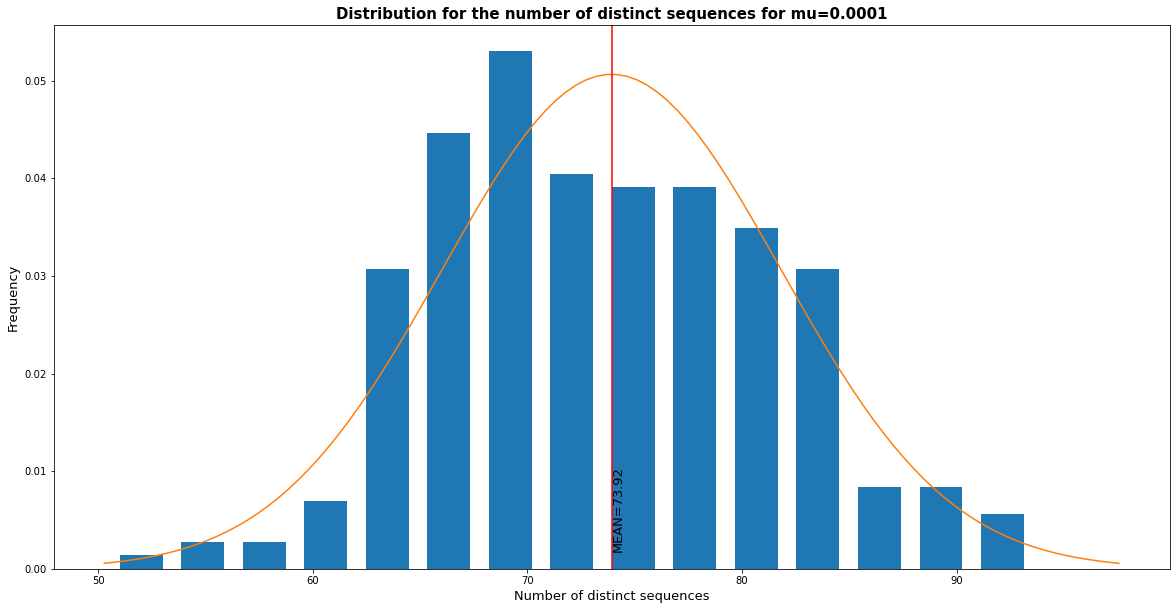

In [95]:
# Figure to plot the distribution of data
plt.figure(dpi=800);
fig, ax = plt.subplots(1, 1);
ax.hist(distinct_250, bins=15, width=2, density = True);

x = np.linspace(mean - 3*s1, mean + 3*s1, 100)
ax.plot(x, sps.norm.pdf(x, mean, s1));

plt.axvline(x=mean, color='r');
plt.text(mean,0.002,'MEAN={}'.format(mean),rotation=90, fontsize = 13);

plt.ylabel('Frequency', fontsize = 13)
plt.xlabel('Number of distinct sequences', fontsize = 13)
plt.title('Distribution for the number of distinct sequences for mu=0.0001', fontsize = 15, fontweight = 'bold');

Just to prove that the t-distribution resembles a normal distribution at larger sample sizes, I have found out the confidence intervals for the same confidence level but by using a normal distribution. As we can see below, the t-distribution does resemble the normal distribution at higher sample sizes. 

In [53]:
### NORMAL DISTRIBUTION

mean=np.mean(distinct_250) #calculating the mean of the sample 
s1=np.std(distinct_250,ddof=1) # calculating the standard deviation of the sample
n1=len(distinct_250) # number of elements in sample size
c1=0.95 #confidence level, estimating an interval 

# to perform a 2 tailed test

t1=sps.norm.interval(alpha=0.95, loc=mean, scale=sps.sem(distinct_250))
upper_95 = t1[1]
lower_95 = t1[0]
margin_error = (upper_95-lower_95)/2 # Margin of error

print('Data information:\n')
print('Sample size = '+str(n1))
print('Mean of',n1,'samples is = '+ str(f"{mean:.3}"))
print('Standard deviation of',n1,'samples is = '+ str(f"{s1:.3}"))

print('\nThe interval in which 95% of the distinct sequences for mu=0.0001 lies between: ['+str(f"{lower_95:.4}")+","+str(f"{upper_95:.4}")+']')
print('This can also be represented as: '+str(f"{mean:.3}")+" +- "+str(f"{margin_error:.3}")+' at confidence level of c='+str(100*c1))

Data information:

Sample size = 250
Mean of 250 samples is = 73.9
Standard deviation of 250 samples is = 7.88

The interval in which 95% of the distinct sequences for mu=0.0001 lies between: [72.94,74.9]
This can also be represented as: 73.9 +- 0.976 at confidence level of c=95.0
